In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
from datetime import datetime
from mlxtend.preprocessing import minmax_scaling

In [4]:
v = [ ]
cluster_product = []
dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y')
df1 = pd.read_csv("data/data_set_1.csv", parse_dates=[1], date_parser=dateparse, encoding='utf-8')
df2 = pd.read_csv("data/data_set_2.csv", parse_dates=[1], date_parser=dateparse, encoding='utf-8')
df = pd.concat([df1,df2]).reset_index(drop=True)
product_list = df['product'].unique()
count = 0
for i in range(len(product_list)):
    if count<100:
        df_prod = df.loc[df['product'] == product_list[i]]
        df_prod_month = df_prod.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
        length = 120
        if len(df_prod_month) >=length:
            val = df_prod_month['quantity'].values
            #print(val[:120])
            v.append(val[:120])
            cluster_product.append(product_list[i])
            #v = np.hstack((v, val[:length]))
            #v = v.reshape(int(len(v)/length),length)
            count+=1

In [5]:
v=np.vstack(v)
v.shape

(100, 120)

In [6]:
# cluster_product

In [7]:
df_cluster = pd.DataFrame(v, columns = [i for i in range(1,121)])
df_cluster_with_product = df_cluster.copy()
df_cluster_with_product["product"] = cluster_product

In [8]:
df_cluster = df_cluster.transpose()
df_cluster.columns = cluster_product
# df_cluster

In [9]:
df_cluster = minmax_scaling(df_cluster, columns=df_cluster.columns)
df_cluster

,S120171810,S174582880,S171364090,S4711E0D90,2.32E+94,S163771690,1.23E+24,1.25E+24,1.25E+44,5.10E+54,...,S170744020,5.20E+24,5.20E+25,S170FE0072,S4402E0E61,S5023E0060,S170FE0180,S4402E0A50,S4702E0830,S440HE0290
1,0.033451,0.219853,0.000000,0.227273,0.000000,0.199711,0.155747,0.197667,0.188927,0.05,...,0.50,0.06250,0.06250,0.117761,0.077922,0.37500,0.180921,0.060870,0.070312,0.50
2,0.073944,0.526982,0.146350,0.000000,0.325440,0.519537,0.544576,0.699935,0.452375,0.05,...,0.00,0.15625,0.15625,0.225869,0.103896,0.28125,0.325658,0.060870,0.164062,0.50
3,0.100352,1.000000,0.289157,0.000000,0.637348,0.673420,0.701396,0.928710,0.722383,0.00,...,0.50,0.25000,0.25000,0.239382,0.012987,0.15625,0.440789,0.008696,0.062500,0.75
4,0.114437,0.321119,0.234585,0.000000,0.491204,0.706705,0.482277,1.000000,0.711624,0.00,...,0.00,0.40625,0.40625,0.179537,0.000000,0.40625,0.467105,0.000000,0.000000,0.50
5,0.100352,0.008661,0.205528,0.000000,0.401894,0.705740,0.310419,0.878159,0.598793,0.00,...,0.00,0.34375,0.34375,0.129344,0.051948,0.18750,0.598684,0.043478,0.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.014085,0.000666,0.184975,0.227273,0.208390,0.054510,0.121375,0.396630,0.036736,0.00,...,0.00,0.12500,0.12500,0.000000,0.207792,0.00000,0.000000,0.478261,0.500000,0.00
117,0.007042,0.001999,0.266478,0.000000,0.207037,0.102267,0.153598,0.431627,0.044608,0.00,...,0.25,0.06250,0.06250,0.000000,0.376623,0.00000,0.000000,0.791304,0.562500,0.00
118,0.014085,0.000000,0.482636,0.227273,0.235453,0.109503,0.114930,0.476345,0.059302,0.00,...,0.00,0.00000,0.00000,0.007722,0.220779,0.00000,0.000000,0.478261,0.500000,1.00
119,0.049296,0.000666,0.681077,0.113636,0.285521,0.057405,0.127820,0.422553,0.073472,0.00,...,0.00,0.03125,0.03125,0.011583,0.376623,0.00000,0.003289,1.000000,0.812500,1.00


In [10]:
#df_cluster.to_csv('cluster_data.csv',index=False)

In [11]:
# for col in df_cluster.columns:
#     fig, ax = plt.subplots(figsize=(8, 4))
#     df_cluster.plot(y=col, use_index=True, ax=ax)
#     ax.set_title(col)
# plt.show()

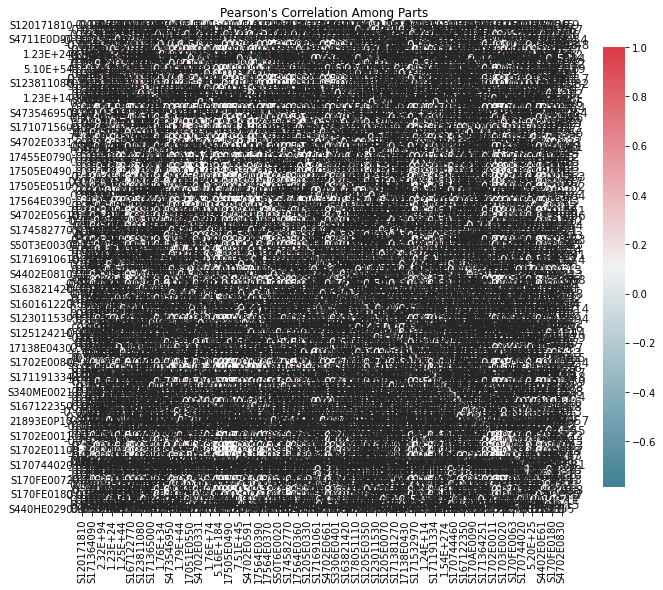

In [12]:
correlation = df_cluster.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        correlation, 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Parts")
plt.savefig("output/correlation.jpg")
plt.show()

In [13]:
last = []
for row in range(0,len(correlation)):
    array = []
    for col in range(0,row+1):
        if correlation.iloc[row,col] >= 0.6:
            array.append(correlation.columns[col])
    last.append(array)
last = sorted(last,key=lambda x: x[0])
# last

In [14]:
new=[]
for idx, ele in enumerate(last):
  #print(idx)
    if idx != len(last)-1:
        if ele[0] != last[idx+1][0]:
        #print("yes")
            new.append(ele) 
    else:
        new.append(ele)  
# new

In [15]:
x = len(new)
for i in new:
    if len(i) > 1:
        y = len(i)

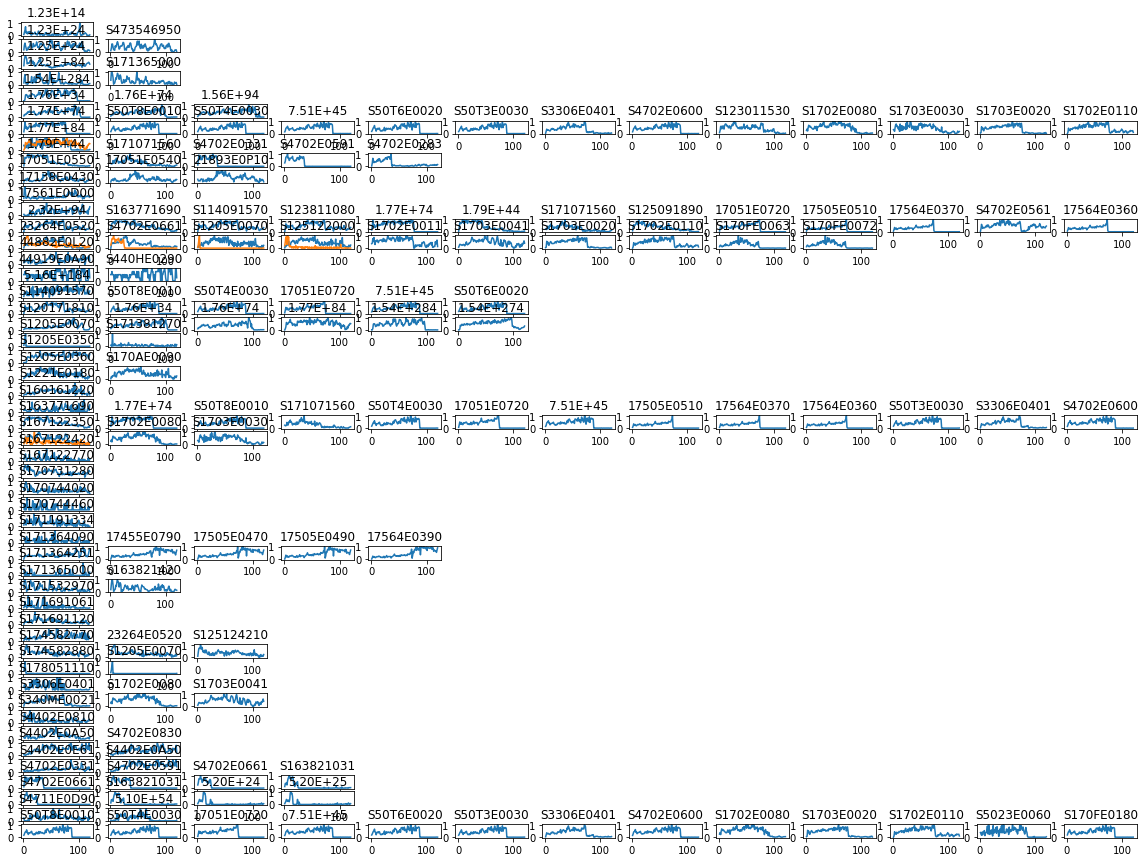

In [16]:
i=0
plt.subplots(figsize=(20, 15))
for row in new:    
    j = 1 + i*y
    for col in row:              
        plt.subplot(x, y, j)
        plt.plot(df_cluster[col])
        plt.title(col)
#         df_cluster.plot(y=col, use_index=True, ax=ax)
#         ax.set_title(col)
        j+=1
    i+=1
# plt.tight_layout()
plt.savefig("output/output.jpg")
plt.show()

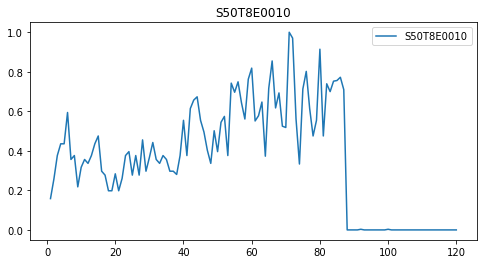

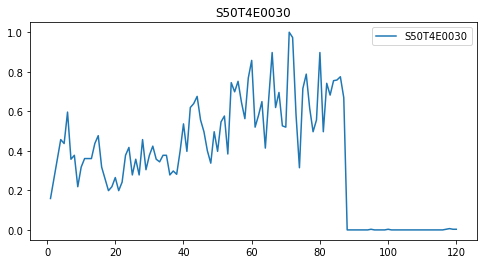

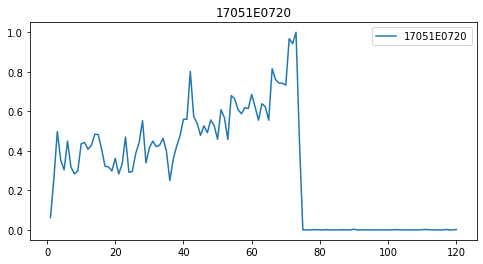

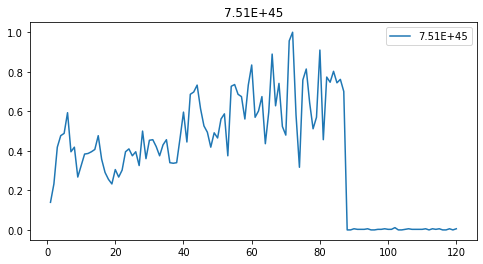

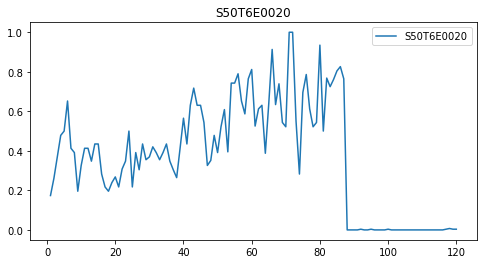

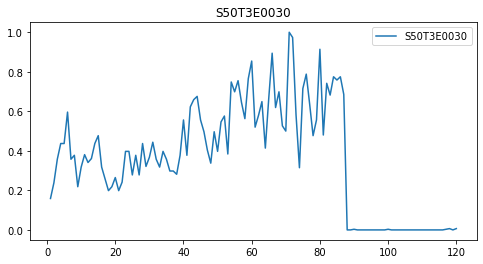

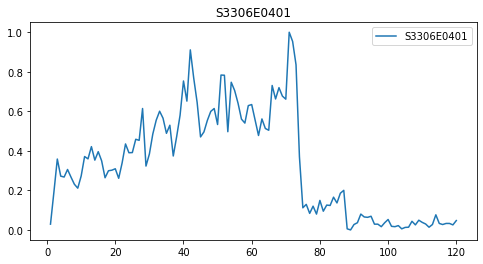

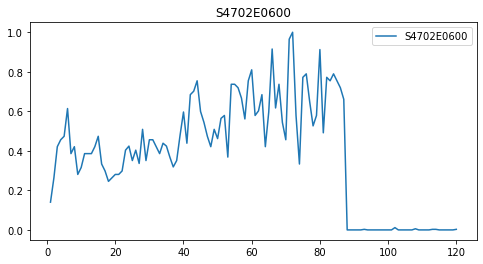

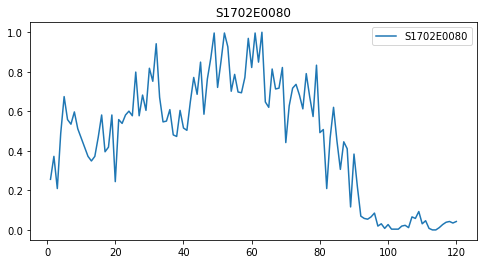

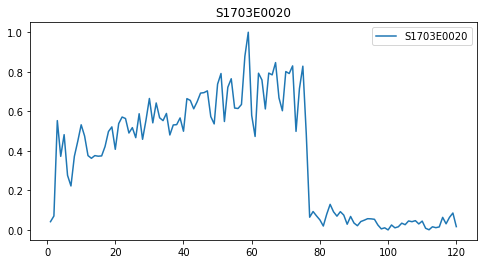

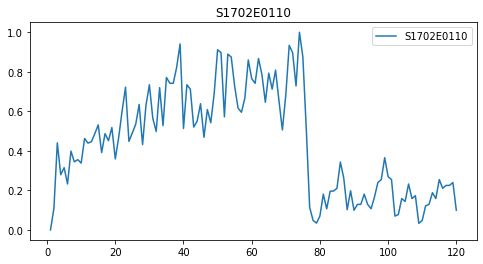

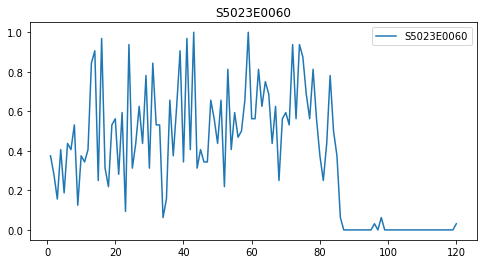

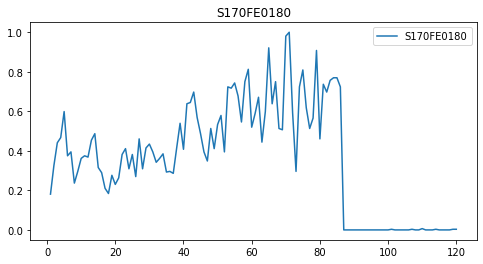

In [18]:
for col in last[-1]:
    fig, ax = plt.subplots(figsize=(8, 4))
    df_cluster.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()